In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import mountains
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
mountain_detail, routes, weather_data = mountains.call_data()

In [75]:
def to_mountainrte(rte):
    route = []
    for key,value in rte.items():
        for v in value:
            route.append([key] + list(v))
    return pd.DataFrame(route)

def to_mountainwea(wea):
    weather = []
    for key,value in wea.items():
        for v in value:
            weather.append([key] + list(v))
    return pd.DataFrame(weather)


In [114]:
fin_routes = to_mountainrte(routes)
fin_routes.columns = ['Mountain','Route','Class',
                     'Snow','ElevationGain','RTMileage']
fin_routes[["ElevationGain","RTMileage"]] = fin_routes[["ElevationGain","RTMileage"]].apply(pd.to_numeric)

In [512]:
fin_weather = to_mountainwea(weather_data)
fin_weather.columns = ['Mountain','Date','Temp',
                     'WindLow','WindHigh','Description']
fin_weather[["Temp","WindLow","WindLow","WindHigh"]] =\
fin_weather[["Temp","WindLow","WindLow","WindHigh"]].apply(pd.to_numeric)
fin_weather['Date'] = pd.to_datetime(fin_weather['Date'])
fin_weather['Hour'] = pd.DatetimeIndex(fin_weather['Date']).hour

In [115]:

fin_mountain = pd.DataFrame.from_dict(mountain_detail).T
fin_mountain.index.name = 'Mountain'
fin_mountain.columns = ['Elevation','Rank',
                     'Range']
fin_mountain.reset_index(level=0, inplace=True)

In [116]:
# How many mountains are in each class 
# Is gain related to class
routes_class = fin_routes.groupby('Class').agg({'ElevationGain': \
    ['min', 'max','median','mean','std'],'RTMileage': ['min', 'max','median','mean','std'], 'Mountain':['nunique']})

In [247]:
# What is the longest/shortest/avg route
routes_insight = fin_routes.groupby('Route').agg({'ElevationGain': ['min', 'max'],'RTMileage': ['min', 'max'],\
                                                  'Mountain':['nunique']})
mountain_route_insight = fin_routes.groupby('Mountain').agg({'ElevationGain': ['min', 'max'],'RTMileage': ['min', 'max']})

In [117]:
# How many mountains still have snowpack - and what class are they
snow_routes = pd.DataFrame(fin_routes[fin_routes.Snow != ' '])

In [120]:
# Which range is the easiest to knock out (lowest avg elevation gain)
elevation = fin_routes.groupby('Mountain') \
.agg({'ElevationGain': ['min', 'max','median','mean','std','sum'], 'Route': ['count']}).round(2)

In [220]:
range_weather = fin_mountain.merge(fin_weather,left_on='Mountain',right_on='Mountain')
agg_weather = fin_weather.groupby('Date').agg({'Temp': ['min', 'max','median','mean','std'], \
                                               'WindHigh': ['min', 'max','median','mean','std']})
range_weather[["Temp","WindLow","WindLow","WindHigh","Rank","Elevation"]] = range_weather[["Temp",\
                "WindLow","WindLow","WindHigh","Rank","Elevation"]].apply(pd.to_numeric)

range_weather_insights =range_weather.groupby('Range').agg({'Elevation':['min', 'max','median','mean','std'], \
            'Rank':['min', 'max','median','mean','std'],'Temp':['min', 'max','median','mean','std'],\
                                    'WindHigh':['min', 'max','median','mean','std'],'Mountain':['nunique']})

[Text(0, 0.5, 'Median Elevation Gain')]

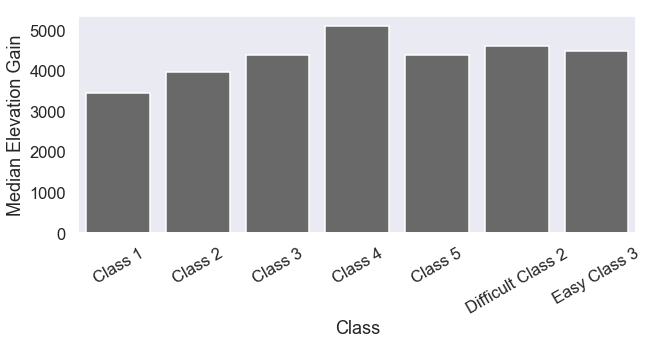

In [343]:
import seaborn as sns
import matplotlib
plt.rcParams['figure.figsize']=(10,4)
sns.set_style("dark")
sns.set_context("talk", font_scale=1)
z = sns.barplot(x=routes_class.index, y="median", data=routes_class['ElevationGain'],color="dimgray")
z.set_xticklabels(routes_class.index,rotation=30)
z.set(ylabel='Median Elevation Gain')

[Text(0.5, 0, 'Median Round Trip Mileage')]

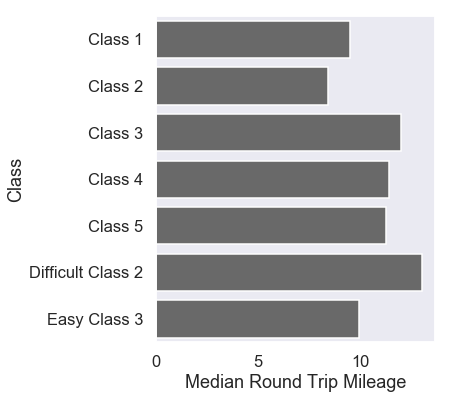

In [347]:
plt.rcParams['figure.figsize']=(5,6)
z = sns.barplot(y=routes_class.index, x="median", data=routes_class['RTMileage'],color='dimgray')
#z.set_xticklabels(routes_class.index,rotation=30)
z.set(xlabel='Median Round Trip Mileage')

In [345]:
mri_elevation = mountain_route_insight['ElevationGain'].sort_values(by='max',ascending=False)[:10]
mri_mileage = mountain_route_insight['RTMileage'].sort_values(by='max',ascending=False)[:10]

[Text(0, 0.5, 'Longest Round Trip Mileage'),
 Text(0.5, 0, 'Longest Route (Miles)')]

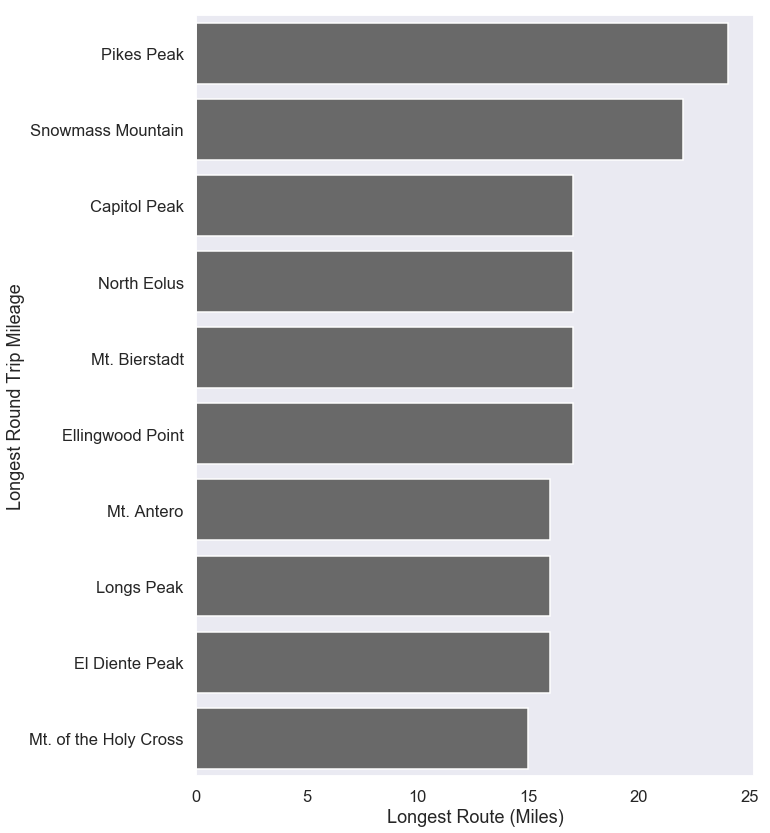

In [558]:
plt.rcParams['figure.figsize']=(10,14) 
z = sns.barplot(x="max", y=mri_mileage.index, \
                data=mri_mileage,color='dimgray')
z.set(ylabel='Longest Round Trip Mileage', xlabel="Longest Route (Miles)")

[Text(0, 0.5, 'Frequency of Distance'), Text(0.5, 0, 'Distance (Miles)')]

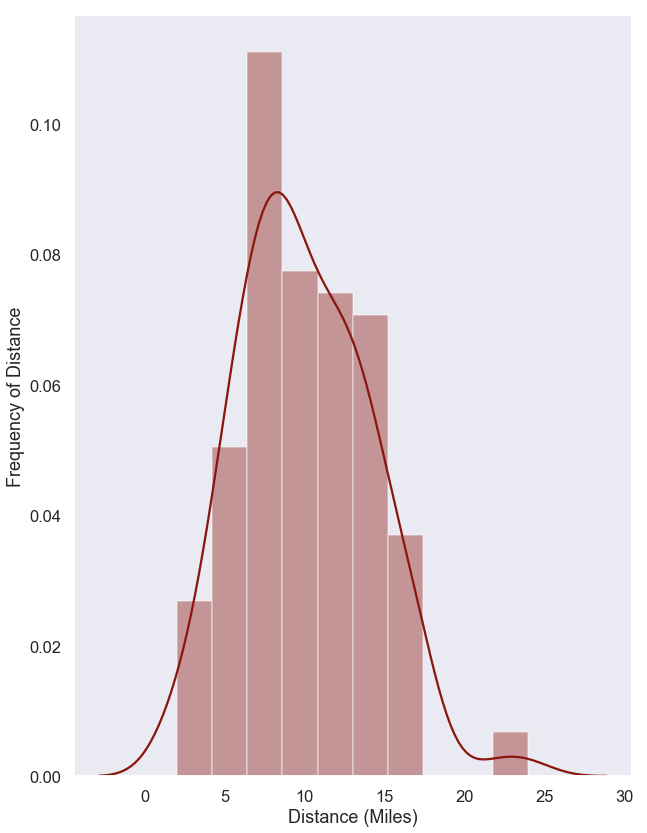

In [513]:
z = sns.distplot(fin_routes['RTMileage'],)
z.set(ylabel='Frequency of Distance', xlabel="Distance (Miles)")

[Text(0, 0.5, 'Frequency of Elevation'), Text(0.5, 0, 'Elevation (Feet)')]

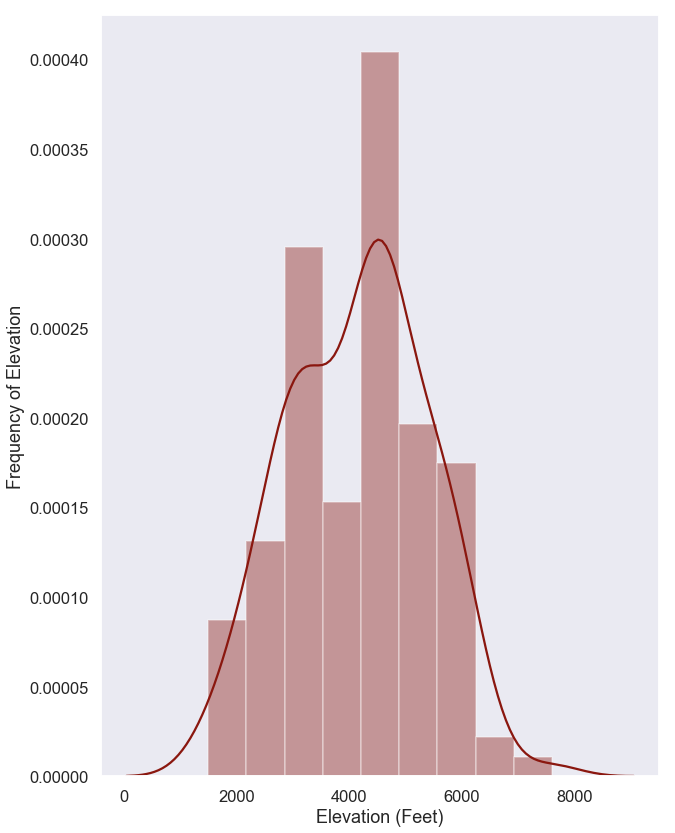

In [387]:
z = sns.distplot(fin_routes['ElevationGain'],)
z.set(ylabel='Frequency of Elevation', xlabel="Elevation (Feet)")

[Text(0.5, 122.0, 'Day')]

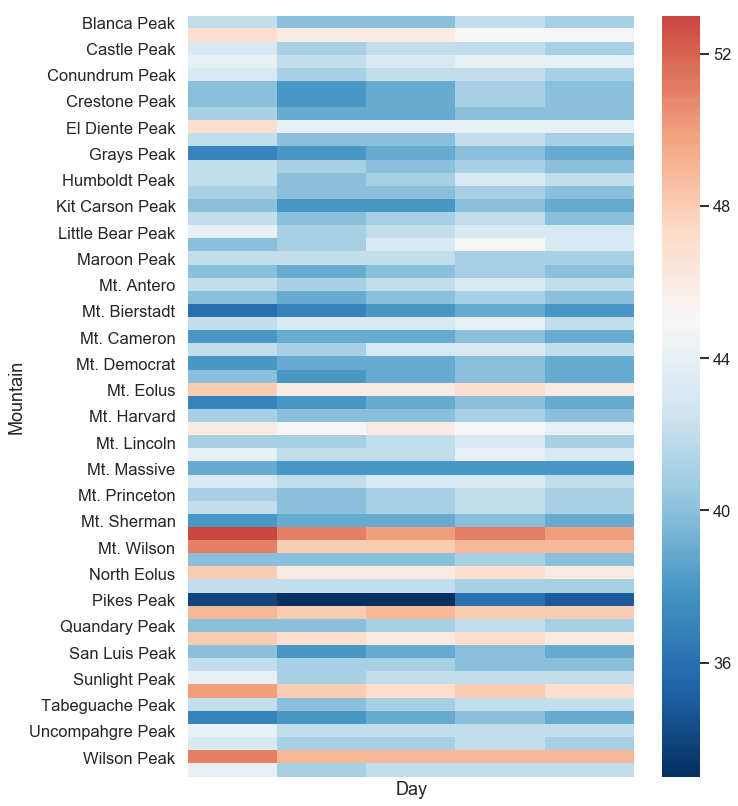

In [586]:
plt.rcParams['figure.figsize']=(10,14)
am_weather = fin_weather[fin_weather['Hour']==0]
wheatm = am_weather.pivot("Mountain", "Date", "Temp")
heat_map = sns.heatmap(wheatm,cmap="RdBu_r",center=45,xticklabels='')
heat_map.set( xlabel="Afternoon Weather")

[Text(0.5, 122.0, 'Evening Weather')]

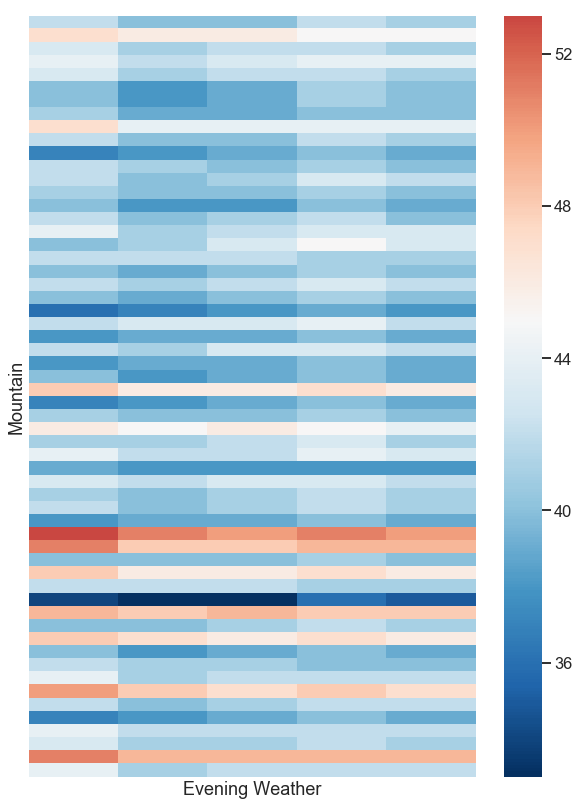

In [588]:
pm_weather = fin_weather[fin_weather['Hour']==0]
pm_map = pm_weather.pivot("Mountain", "Date", "Temp")
heat_map = sns.heatmap(pm_map,cmap="RdBu_r",center=45,xticklabels='' ,yticklabels='')
heat_map.set( xlabel="Evening Weather")

In [583]:
aft_weather = fin_weather[fin_weather['Hour']==0]
aft_weather_map = aft_weather.groupby(['Mountain','just_date']).agg({'Temp': ['mean']})
aft_map = aft_weather_map.pivot("Mountain", "just_date", "Temp")

KeyError: 'just_date'

In [ ]:
#elevation
    #elevation.ElevationGain.sort_values(by='min')
    #elevation.ElevationGain.sort_values(by='max')
    #elevation.ElevationGain.sort_values(by='median')
#agg_weather
    #agg_weather['Temp']
    #agg_weather['WindHigh']
#range_weather_insights
#fin_mountain
#fin_routes
#fin_weather